In [ ]:
import sys
sys.path.append("/users/PCON0003/cond0068/ARA/root6_18_build/lib") # go to parent dir
# sys.path.append("/users/PAS0654/osu8354/ARA/AraRootBuild/lib/") # go to parent dir

from ROOT import TCanvas, TGraph
from ROOT import gROOT
import ROOT
import os
import matplotlib.pyplot as plt
# from TimingCalibration import HistPlotter2D
import numpy as np
# ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libGraf3d.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libTreePlayer.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libPostscript.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libPhysics.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libROOTDataFrame.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libMathMore.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libMinuit.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libSpectrum.so")
ROOT.gSystem.Load("/users/PCON0003/cond0068/ARA/root6_18_build/lib/libRint.so")

ROOT.gSystem.Load( '%s/lib/libAraEvent.so' % ( os.getenv('HOME') ) )

print('%s/lib/libAraEvent.so'%(os.getenv('HOME')))
print(os.environ['HOME'])
from AutomaticLoadData import LoadDataFromWeb
from TimingCalibration_final import AddOffsets
from TimingCalibration_final import CorrectTimingSample
from VoltageCalibration import CorrectVoltage

## Define variables and functs

In [2]:
# sample = np.load('./ARA4_cal_files/samples_%i_%ifirst.npy'%(run,ch))

from scipy import optimize

def SineFit(t,v,freq):
    params, params_covariance = optimize.curve_fit(SineFunc,t,v,p0=[freq,np.pi/2.0,350])#,bounds=([-np.inf,-np.inf,200],[np.inf,np.inf,np.inf]))#freq,offset,amplitude,voff
    if(params[2]<0):
        params[2]=np.abs(params[2])
        params[1]=params[1]+np.pi
    params[1]=params[1]%(np.pi*2)
    while(params[1]<0):
        params[1]=params[1]+np.pi*2.0
    return(params)
def SineFunc(t,k,phi,A): #time, freq, offset, amplitude
    return A*np.sin(2*np.pi*k*t-phi)


In [3]:
def HistPlotter2D_jitter(chan,runNum):
    sample = np.load('./ARA4_cal_files/samples_%i_%ifirst.npy'%(runNum,chan))
    sample_f = np.load('./ARA4_cal_files/samples_%i_%ifinal.npy'%(runNum,chan))
    jitter = np.load('./ARA4_cal_files/jitter_%i_%ifirst.npy'%(runNum,chan))
    jitter_f = np.load('./ARA4_cal_files/jitter_%i_%ifinal.npy'%(runNum,chan))

    sample_even=[]
    jitter_even = []
    sample_odd=[]
    jitter_odd = []
    sample_even_f =[]
    jitter_even_f = []
    sample_odd_f =[]
    jitter_odd_f = []


    for j in range(0,len(sample)):
        if(sample[j]%2==0):#if even
            sample_even.append(sample[j])
            jitter_even.append(jitter[j])
        else:
            sample_odd.append(sample[j])
            jitter_odd.append(jitter[j])
            
        if(sample_f[j]%2==0):#if even
            sample_even_f.append(sample_f[j])
            jitter_even_f.append(jitter_f[j])
        else:
            sample_odd_f.append(sample_f[j])
            jitter_odd_f.append(jitter_f[j])


    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    even_hist_i = ax[0,0].hist2d(sample_even,jitter_even,bins=(128,128),cmap=plt.cm.jet,range=np.array([(0.0,128.0),(-1.0,1.0)]),vmin=0, vmax=70)
    ax[0,0].set_title("Even samples (no calib), run %i, ch %i"%(runNum,chan),fontsize=14)
    ax[0,0].set_ylabel("Offset [ns]",fontsize=12)
    ax[0,0].set_xlabel("Samples",fontsize=12)
    # ax[0].set_ylim(-180,180)
    fig.colorbar(even_hist_i[3],ax=ax[0,0])
    
    even_hist_f = ax[0,1].hist2d(sample_even_f,jitter_even_f,bins=(128,128),cmap=plt.cm.jet,range=np.array([(0.0,128.0),(-1.0,1.0)]),vmin=0, vmax=70)
    ax[0,1].set_title("Even samples (calibrated), run %i, ch %i"%(runNum,chan),fontsize=14)
    ax[0,1].set_ylabel("Offset [ns]",fontsize=12)
    ax[0,1].set_xlabel("Samples",fontsize=12)
    fig.colorbar(even_hist_f[3],ax=ax[0,1])

    odd_hist_i = ax[1,0].hist2d(sample_odd,jitter_odd,bins=(128,128),cmap=plt.cm.jet,range=np.array([(0.0,128.0),(-1.0,1.0)]),vmin=0, vmax=70)
    ax[1,0].set_title("Odd samples (no calib), run %i, ch %i"%(runNum,chan),fontsize=14)
    ax[1,0].set_ylabel("Offset [ns]",fontsize=12)
    ax[1,0].set_xlabel("Samples",fontsize=12)
    fig.colorbar(odd_hist_i[3],ax=ax[1,0])
    
    even_hist_f = ax[1,1].hist2d(sample_odd_f,jitter_odd_f,bins=(128,128),cmap=plt.cm.jet,range=np.array([(0.0,128.0),(-1.0,1.0)]),vmin=0, vmax=70)
    ax[1,1].set_title("Odd samples (calibrated), run %i, ch %i"%(runNum,chan),fontsize=14)
    ax[1,1].set_ylabel("Offset [ns]",fontsize=12)
    ax[1,1].set_xlabel("Samples",fontsize=12)
    fig.colorbar(even_hist_f[3],ax=ax[1,1])

    fig.tight_layout()
    fig.savefig("timeOffset_run%i_ch%i.png"%(runNum,chan), dpi=200)

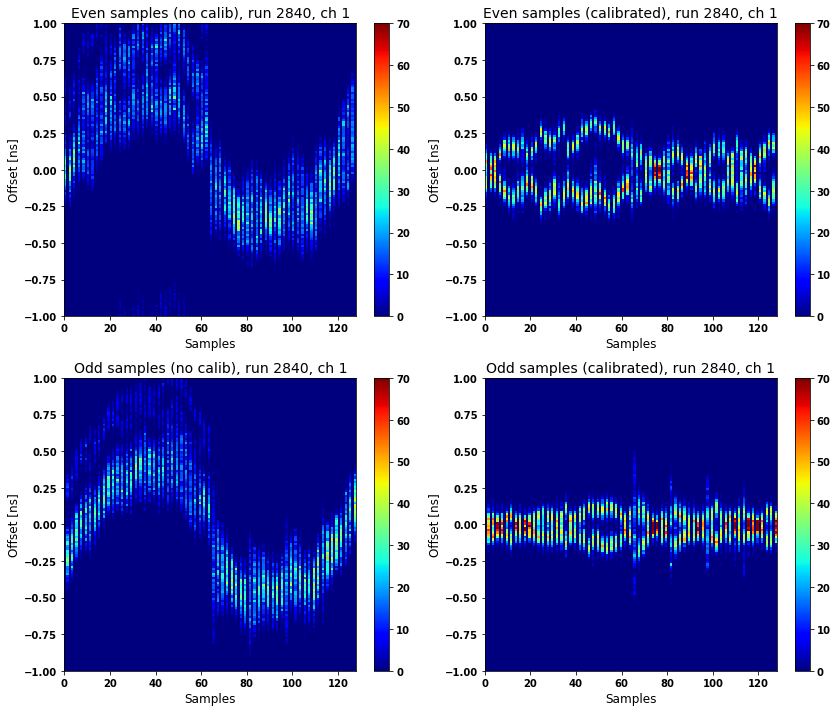

In [4]:
ch=1
run=2840
HistPlotter2D_jitter(ch,run)

In [5]:
channel = 1

In [ ]:
wf_len = 896

#load in data
all_times, volt,blocks = LoadDataFromWeb(4,2840,"0118","2018",channel,896,0,1,0,0,1)
time = all_times[0]-all_times[0][0]
print('number of events is', np.shape(volt)[0])

#define all variables
num_blocks=len(volt[:,0])#num blocks entries = num events

best_params = np.zeros([num_blocks,4]) #creates a num_blocksx4 array
odds = np.linspace(1,wf_len-1,wf_len/2,dtype=int) #a list containing only odd numbers
evens = np.linspace(0,wf_len-2,wf_len/2,dtype=int)

odd_params=np.zeros([num_blocks,3])
even_params=np.zeros([num_blocks,3])
odd_params2 = np.zeros([num_blocks,3])

odd_half = np.linspace(1,63,32,dtype=int)
even_half= np.linspace(0,62,32,dtype=int)
odd_half2 = np.linspace(65,127,32,dtype=int)

jitter_avg = np.zeros(128)
t_cal = np.zeros(128)

#load all 128 samples into arrays
best_blocks = []
best_freqs = []
jitter_total = []
odd_diffs = []
line_diffs = []

spacing = 0.625#This is the spacing, in ns, between odd/even samples

if(t_cal[5]==0.0):
    print('clearing out old t_cal')
    t_cal=time[:128]
    print(t_cal)

t_cal_full = time
#print('t_cal before is', t_cal_full)

odd_mean = 0.0
even_mean = 0.0

### Calculate Wrap around

In [ ]:
t_cal_full,odd_mean,even_mean=AddOffsets(t_cal_full,volt,0.218,odds,odd_mean,even_mean, channel)
# cal_t= np.zeros(128)
# calT = CorrectTimingSample(2830,channel,0.353,cal_t,4)

In [ ]:
plt.plot(t_cal_full+all_times[0][0],volt[0],label="t_cal_full")
plt.plot(all_times[0],volt[0],"--",label="all_times")
# plt.xlim(50,60)
plt.legend()

In [ ]:
t_cal_full[5]-t_cal_full[3]

In [6]:
total_samples=896
all_times, ADC,block_nums = LoadDataFromWeb(4,"2840","0529","2018",int(channel),total_samples,0,1,1,0,1)
times, ADC_raw,block_nums = LoadDataFromWeb(4,"2840","0529","2018",int(channel),total_samples,0,1,0,0,1)

In [7]:
np.shape(ADC), np.shape(ADC_raw)

((1994, 896), (1994, 896))

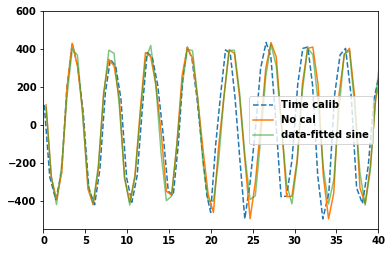

In [8]:
params = SineFit(all_times[1,1::2],ADC[1,1::2],0.217)
plt.plot(all_times[1,1::2],ADC[1,1::2],"--", label="Time calib")
plt.plot(times[1,1::2]-times[1,0],ADC_raw[1,1::2], label="No cal")
plt.plot(times[1,1::2]-times[1,0], SineFunc(all_times[1,1::2],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
# plt.plot(time_cal[1::2],volt[1,1::2], label="time_corrected")
plt.xlim(0,40)
plt.legend()

In [9]:
time_cal = np.load('./ARA4_cal_files/t_cal_2840_1.npy')

In [10]:
times[1][0:20]

array([40.3125, 40.625 , 40.9375, 41.25  , 41.5625, 41.875 , 42.1875,
       42.5   , 42.8125, 43.125 , 43.4375, 43.75  , 44.0625, 44.375 ,
       44.6875, 45.    , 45.3125, 45.625 , 45.9375, 46.25  ])

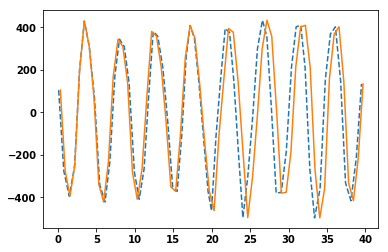

In [13]:
plt.plot(all_times[1][1:128:2],ADC[1][1:128:2],"--", label="Time calib")
plt.plot(times[1][1:128:2]-times[1,0],ADC_raw[1][1:128:2], label="No cal")

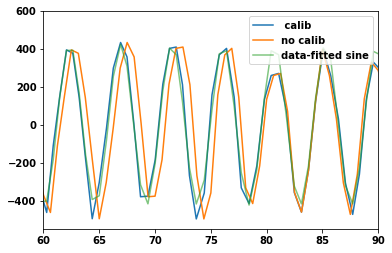

In [12]:
params = SineFit(time_cal[1::2],ADC_raw[1,1::2],0.217)
plt.plot(time_cal[1::2]+times[1,0],ADC_raw[1,1::2], label=" calib")
plt.plot(times[1,1::2],ADC_raw[1,1::2], label="no calib")
plt.plot(time_cal[1::2]+times[1,0], SineFunc(time_cal[1::2],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
plt.xlim(60,90)
plt.legend()


In [ ]:
time_cal[0]